$$UNIVERSIDAD\hspace{1mm} AUTÓNOMA\hspace{1mm} DE\hspace{1mm} NUEVO\hspace{1mm} LEÓN $$$$Facultad\hspace{1mm}  de\hspace {1mm}Ciencias\hspace{1mm} Físico-Matemáticas $$$$Ejercicios\hspace{1mm} 1 $$$$Mineria\hspace{1mm}de\hspace{1mm}Datos$$$$\hspace{1mm}$$

#### Equipo: Visualización de datos

$Nombre$ $\hspace{45mm}$  $Matricula$ <br>
 Flor Karina Juárez Rodríguez $\hspace{12mm}$ 1802920  <br>
 Gloria Nohemí Martínez Jiménez $\hspace{6mm}$ 1805800 <br>
 Pilar Abigail Mendoza Alvarez $\hspace{11mm}$ 1815973 <br>
 Margarita Ordaz Ruiz $\hspace{25mm}$ 1802473 <br>
 Tania Sarahi Rossel Castillo $\hspace{14mm}$ 1810461  <br>

In [1]:
#Datos x
Altura = [ 162, 212, 220, 206, 152, 183, 167, 175, 156, 186, 183, 163, 163, 172, 194, 168, 161, 164, 
          188, 187, 162, 192, 184, 206, 175, 154, 187, 212, 195, 205 ]

#Datos y
Peso = [ 68.78, 74.11, 71.73, 69.88, 67.25, 68.78, 68.34, 67.01, 63.45, 71.19, 67.19, 65.8, 64.3, 67.97,
        72.18, 65.27, 66.09, 67.51, 70.1, 68.25, 67.89, 68.14, 69.08, 72.8, 67.42, 68.49, 68.61, 74.03, 71.52, 69.18 ]

In [2]:
import pandas as pd

tabla = {'Altura': Altura, 'Peso': Peso}

Mostrart = pd.DataFrame(tabla)

#### EJERCICIO REGRESIÓN LINEAL ####
Tomando los datos de la siguiente tabla sobre los pesos y alturas de una población de 30 personas, crea
una gráfica en donde el valor x represente la altura y el valor y represente el peso. Después traza una línea
que se apegue lo mas posible a los datos que graficaste.

In [3]:
Mostrart

,Altura,Peso
0,162,68.78
1,212,74.11
2,220,71.73
3,206,69.88
4,152,67.25
5,183,68.78
6,167,68.34
7,175,67.01
8,156,63.45
9,186,71.19


In [4]:
import matplotlib.pyplot as plt

plt.scatter(x=Altura , y=Peso,  marker='*', c='pink', s=60)
plt.show()

<Figure size 640x480 with 1 Axes>

In [5]:
import numpy as np

array_x = np.array(Altura)
array_y = np.array(Peso)

In [6]:
n = len(array_x)
sum_x = sum(array_x)
sum_y = sum(array_y)
sum_xy = sum(array_x*array_y)
sum_xx = sum(array_x*array_x)
sum_yy = sum(array_y*array_y)

In [7]:
# Se obtienen los valores
s_xy = sum_xy-(1/n)*sum_x*sum_y
s_xx = sum_xx-(1/n)*sum_x**2

beta_1 = s_xy / s_xx
beta_0 = (1/n)*sum_y - beta_1*(1/n)*sum_x

# Imprimir los resultados
print("La estimación de los parámetros para el modelo de regresión son: ")
print("beta1: "+str(beta_1))
print("beta0: "+str(beta_0))

La estimación de los parámetros para el modelo de regresión son: 
beta1: 0.1086107819535774
beta0: 49.07163369547534


Estos resultados nos llevan a concluir el siguiente modelo de regresión para los datos dados:
$$ y =  \hat{\beta}_{0} + \hat{\beta}_{1}*x =  49.07163 + 0.10861*x$$
Ahora agregaremos esta línea dentro del gráfico

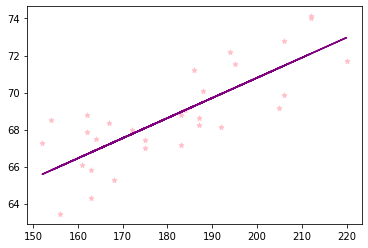

In [8]:
import matplotlib.pyplot as plt

plt.scatter(x=Altura , y=Peso,  marker='*', c='pink', s=25)
plt.plot(array_x, beta_0 + beta_1 * array_x, '-', c='purple')

#### REGLAS DE ASOCIACIÓN ####
Observa la tabla que se describe a continuación. Utilizando el algoritmo a priori, y la técnica de asociación, realiza la tabla de relaciones y resuelve cuál es el nivel **K** de soporte más alto al que podemos llegar con estos datos teniendo un umbral de 0.5.

In [9]:
pip install apyori

Note: you may need to restart the kernel to use updated packages.


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from apyori import apriori

In [11]:
datos={'ID':[1,2,3,4,5],'Transacciones':["A" "B" "C" "E","B" "E","C" "D" "E","A" "C" "D","A" "C" "E"]}

In [12]:
Tabla=pd.DataFrame(datos,columns=['ID','Transacciones'])
Tabla

,ID,Transacciones
0,1,ABCE
1,2,BE
2,3,CDE
3,4,ACD
4,5,ACE


In [13]:
records = []
for i in range(0, 5):
    records.append([str(Tabla.Transacciones[i][j]) for j in range(0,len(Tabla.Transacciones[i]))])

In [14]:
rules = apriori(records, min_support = 0.5, min_confidence = 0.5, min_lift = 0, min_length =1)

In [15]:
results = list(rules)

In [16]:
antecedents = [tuple(item[0]) for result in results for item in result[2]]
consecuents = [tuple(item[1]) for result in results for item in result[2]]
supports = [result[1] for result in results for item in result[2]]
confidences = [item[2] for result in results for item in result[2]]
lifts = [item[3] for result in results for item in result[2]]
table = list(zip(antecedents, consecuents, supports, confidences, lifts))

In [17]:
TablaDeResultados=pd.DataFrame(table, columns = ['Antecedente', 'Consecuente', 'Soporte','Confianza', 'Lift'])
TablaDeResultados

,Antecedente,Consecuente,Soporte,Confianza,Lift
0,(),"(A,)",0.6,0.60,1.0000
1,(),"(C,)",0.8,0.80,1.0000
2,(),"(E,)",0.8,0.80,1.0000
3,(),"(A, C)",0.6,0.60,1.0000
4,"(A,)","(C,)",0.6,1.00,1.2500
5,"(C,)","(A,)",0.6,0.75,1.2500
6,(),"(E, C)",0.6,0.60,1.0000
7,"(C,)","(E,)",0.6,0.75,0.9375
8,"(E,)","(C,)",0.6,0.75,0.9375


   ##### K=1 #####
**A**
*Soporte=0.6
Confianza=0.6
Lift=1*

**C**
*Soporte=0.8
Confianza=0.8
Lift=1*

**E**
*Soporte=0.8
Confianza=0.8
Lift=1*

##### K=2 #####

**(A,C)**
*Soporte=0.6
Confianza=0.6
Lift=1*

**A->C**
*Soporte=0.6
Confianza=1
Lift=1.25*

**C->A**
*Soporte=0.6
Confianza=0.75
Lift=1.25*








**(C,E)**
*Soporte=0.6
Confianza=0.6
Lift=1*

**C->E**
*Soporte=0.6
Confianza=0.75
Lift=0.9375*

**E->C**
*Soporte=0.6
Confianza=0.75
Lift=0.9375*




El nivel de soporte más alto con umbral de 0.5 es **K = 2**.

Con un umbral de 0.5 obtenemos las siguientes reglas de asociación:

- A -> C 
- C -> A  
- C -> E 
- E -> C

Un **lift>1** indica que ese conjunto aparece una cantidad de veces superior a lo esperado bajo condiciones de independencia, por lo que se puede intuir que existe una relación que hace que los productos se encuentren en el conjunto más veces de lo normal.

Por lo que las mejores reglas de asociación son **A->C** y **C->A**